In [1]:
from amuse.lab import *

/Users/boydvanderplaat/miniforge3/envs/Amuse-env/lib/python3.12/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
from amuse.community.phantom.interface import Phantom

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [10]:
# running a smoothed particle hydrodynamics simulation
mass   = 1.0 | units.Msun
radius = 1.0 | units.parsec # defining the mass and size of my system
converter = nbody_system.nbody_to_si(mass, radius)

number_of_particles = 1000
end_time            = 10 | units.Myr
dt                  = 0.5 | units.Myr

gas = new_plummer_gas_model(number_of_particles, convert_nbody=converter) # a gas distribution using a kind of spherical density profile
# with n gas particles
gas.hydro_radius = 0.01 | units.parsec # this tells the system how far to look for neighbours when calculating pressure etc

phantom = Phantom(converter)
phantom.particles.add_particles(gas)

# plotting the particles in an animation 
frames = []
times  = []

time = 0.0 | units.Myr
while time <= end_time:
    phantom.evolve_model(time)
    position = phantom.particles.position.value_in(units.parsec)
    frames.append(position)
    times.append(time.value_in(units.Myr))
    time += dt

phantom.stop()

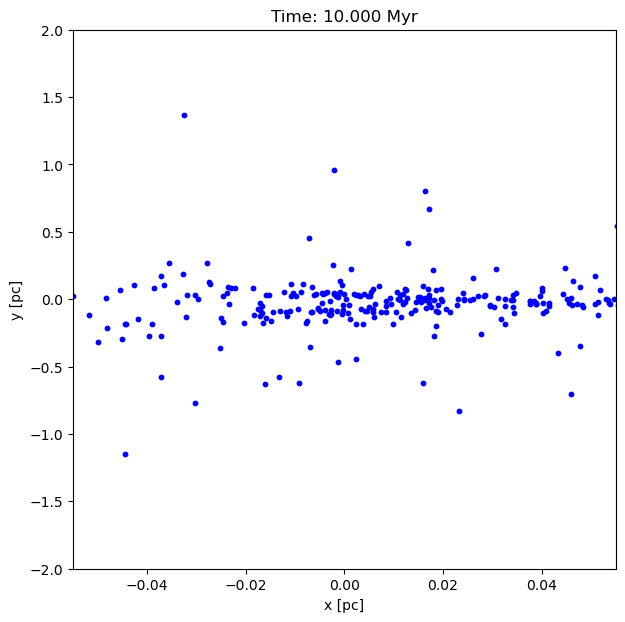

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ensure frames and times are numpy arrays
frames_np = np.array(frames)   # (num_frames, num_particles, 3)
times_np = np.array(times)     # (num_frames,)

num_frames, num_particles, _ = frames_np.shape

fig, ax = plt.subplots(figsize=(7,7))
scat = ax.scatter([], [], s=10, color='blue')

# Set axis limits wider than your data range
ax.set_ylim(-2, 2)
ax.set_xlabel('x [pc]')
ax.set_ylabel('y [pc]')
title = ax.set_title('Time: 0.00 Myr')

def init():
    scat.set_offsets(frames_np[0][:, :2])
    title.set_text(f"Time: {times_np[0]:.3f} Myr")
    return scat, title

def update(frame_num):
    pos = frames_np[frame_num]
    xy = pos[:, :2]
    scat.set_offsets(xy)
    title.set_text(f"Time: {times_np[frame_num]:.3f} Myr")
    return scat, title

anim = FuncAnimation(
    fig, update, frames=num_frames, init_func=init,
    interval=100, blit=False
)
anim.save("animation.mp4", writer="ffmpeg")
plt.show()



In [6]:
print("Frames shape:", frames_np.shape)
print("Sample positions (first frame, first 5 particles):")
print(frames_np[0][:5, :2])
print("X min/max:", frames_np[:,:,0].min(), frames_np[:,:,0].max())
print("Y min/max:", frames_np[:,:,1].min(), frames_np[:,:,1].max())

Frames shape: (20, 1000, 3)
Sample positions (first frame, first 5 particles):
[[ 0.18482097 -0.50779491]
 [ 0.36147186  0.79373811]
 [ 0.50019984 -0.4528416 ]
 [-0.58002487 -0.10142111]
 [ 0.09047288 -0.24519037]]
X min/max: -8.03356979264 7.40485144792
Y min/max: -7.01711020111 6.47215603351
